<a href="https://colab.research.google.com/github/kushantp58/Neural-Nets-Repo/blob/master/Playing_with_Cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
i = misc.ascent() ## using ascent method from routines for a 8-bit grayscale bit-depth, 512 x 512 derived image for easy use

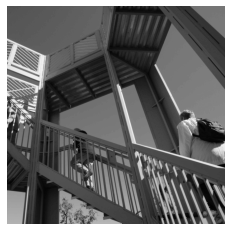

In [22]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [23]:
## store the image in a numpy array
i_transformed = np.copy(i)
x_size = i_transformed.shape[0]
y_size = i_transformed.shape[1]

In [24]:
## Creation of a filter
#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#filter = [ [-1,-2,-1],[0,0,0],[1,2,1]]

## setting a weight of .1 if you want to normalize them
weight = .1

## creation of a coonvolution for iterating over an image leaving a 1 pixel margin and multiply 
## out each of the neighbors of current pixel by the value defined in the filter 
## load the output value into the transformed image


In [25]:

for x in range(1,x_size-1):
  for y in range(1,y_size-1):
      convolution = 0.0
      convolution = convolution + (i[x-1,y-1]+filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution + weight
      if(convolution<0):
        convolution = 0
      if(convolution>255):
        convolution = 255
      i_transformed[x,y] = convolution

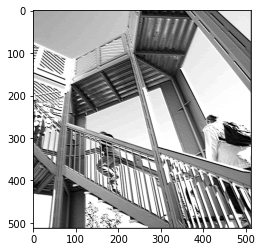

In [26]:
### plot the image 
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

## now next part is a pooling layer where the idea is to iterate over the image and look at 
## the pixel and it's immediate neighbors to the right , beneath and right-beneath and load it into new image
## the new image output will be a quarter of the original image with the x and y dimensions halved 
## but the features get maintained in the process.

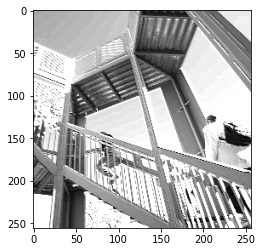

In [27]:


x_new = int(x_size/2)
y_new = int(y_size/2)
image_new = np.zeros((x_new,y_new))
for x in range(0,x_size,2):
  for y in range(0,y_size,2):
    pixels = []
    pixels.append(i_transformed[x,y])
    pixels.append(i_transformed[x+1,y])
    pixels.append(i_transformed[x,y+1])
    pixels.append(i_transformed[x+1,y+1])
    image_new[int(x/2),int(y/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(image_new)
plt.show()